In [ ]:
#LETS'START

In [29]:
#MACHINE LEARNING

In [30]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [31]:
# Load dataset
url = r"C:\Users\NourTech\Desktop\iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [32]:
# shape
print(dataset.shape)

(151, 5)


In [33]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width   class
0            5.0          3.5           1.4          0.2  Setosa
1            5.1          3.5           1.4          0.2  Setosa
2            4.9          3.0           1.4          0.2  Setosa
3            4.7          3.2           1.3          0.2  Setosa
4            4.6          3.1           1.5          0.2  Setosa
5            5.0          3.6           1.4          0.2  Setosa
6            5.4          3.9           1.7          0.4  Setosa
7            4.6          3.4           1.4          0.3  Setosa
8            5.0          3.4           1.5          0.2  Setosa
9            4.4          2.9           1.4          0.2  Setosa
10           4.9          3.1           1.5          0.1  Setosa
11           5.4          3.7           1.5          0.2  Setosa
12           4.8          3.4           1.6          0.2  Setosa
13           4.8          3.0           1.4          0.1  Setosa
14           4.3         

In [34]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    151.000000   151.000000    151.000000   151.000000
mean       5.837748     3.060265      3.742384     1.192715
std        0.828150     0.435902      1.769838     0.764033
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.550000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.350000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [35]:
# class distribution
print(dataset.groupby('class').size())

class
Setosa        51
Versicolor    50
Virginica     50
dtype: int64


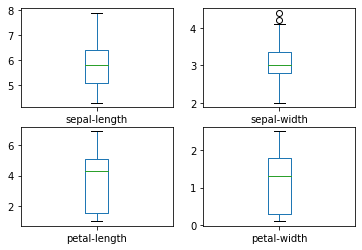

In [36]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

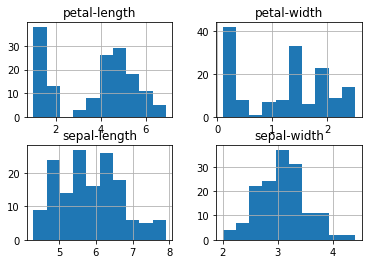

In [37]:
# histograms
dataset.hist()
pyplot.show()

In [38]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [39]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.942832 (0.052968)
LDA: 0.982576 (0.034890)
KNN: 0.982576 (0.034890)
CART: 0.965793 (0.042058)
NB: 0.958100 (0.042133)
SVM: 0.982576 (0.034890)


In [40]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [41]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.9354838709677419
[[11  0  0]
 [ 0 12  2]
 [ 0  0  6]]


In [42]:
# the END OF THE PROJECT